In [47]:
# import necessary librares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE


In [5]:
# Load the datasets
transactions_data = pd.read_csv("C:/Users/admin/Desktop/internship/transactions.csv")
cc_info_data = pd.read_csv("C:/Users/admin/Desktop/internship/cc_info.csv")


In [6]:
# Merge datasets
merged_data = pd.merge(transactions_data, cc_info_data, on='credit_card', how='inner')


In [40]:
merged_data.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,fraud
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.17,40.27,Houston,PA,15342,20000,0
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.19,40.18,Houston,PA,15342,20000,0
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.21,40.31,Houston,PA,15342,20000,0
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.17,40.29,Houston,PA,15342,20000,0
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.24,40.17,Houston,PA,15342,20000,0


In [41]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   date                       294588 non-null  datetime64[ns]
 2   transaction_dollar_amount  294588 non-null  float64       
 3   Long                       294588 non-null  float64       
 4   Lat                        294588 non-null  float64       
 5   city                       294588 non-null  object        
 6   state                      294588 non-null  object        
 7   zipcode                    294588 non-null  int64         
 8   credit_card_limit          294588 non-null  int64         
 9   fraud                      294588 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 22.5+ MB


In [42]:
merged_data.shape

(294588, 10)

In [44]:
# checking for missing values
merged_data.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
fraud                        0
dtype: int64

In [46]:
merged_data.columns

Index(['credit_card', 'date', 'transaction_dollar_amount', 'Long', 'Lat',
       'city', 'state', 'zipcode', 'credit_card_limit', 'fraud'],
      dtype='object')

In [7]:
# Convert 'date' column to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])


In [8]:
# Generate synthetic 'fraud' column (1% fraud cases)
np.random.seed(42)
merged_data['fraud'] = np.random.choice([0, 1], size=len(merged_data), p=[0.99, 0.01])


In [13]:
# Set pandas to display numbers in plain format
pd.set_option('display.float_format', '{:.2f}'.format)
# EDA: Summary Statistics
print("Summary Statistics:")
print(merged_data.describe())


Summary Statistics:
              credit_card                           date  \
count           294588.00                         294588   
mean  5424562377928500.00  2015-09-14 14:26:06.402908416   
min   1003715054175576.00            2015-07-31 09:39:48   
25%   3344214228396727.00  2015-08-22 15:18:50.249999872   
50%   5353425661157701.00     2015-09-13 23:49:47.500000   
75%   7646245348474631.00  2015-10-07 20:36:12.249999872   
max   9999757432802760.00            2015-10-30 10:54:58   
std   2555803172878105.00                            NaN   

       transaction_dollar_amount      Long       Lat   zipcode  \
count                  294588.00 294588.00 294588.00 294588.00   
mean                       86.01    -76.24     40.94  18073.77   
min                         0.01   -179.39    -68.05    690.00   
25%                        29.97    -80.21     40.49   3280.00   
50%                        58.47    -73.20     42.40   5820.00   
75%                       100.40    -72.09 

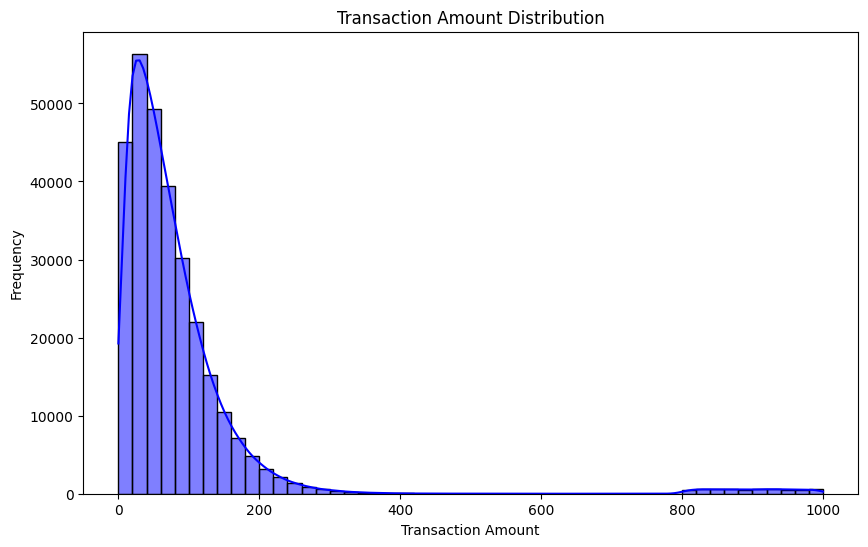

In [14]:
# EDA: Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['transaction_dollar_amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

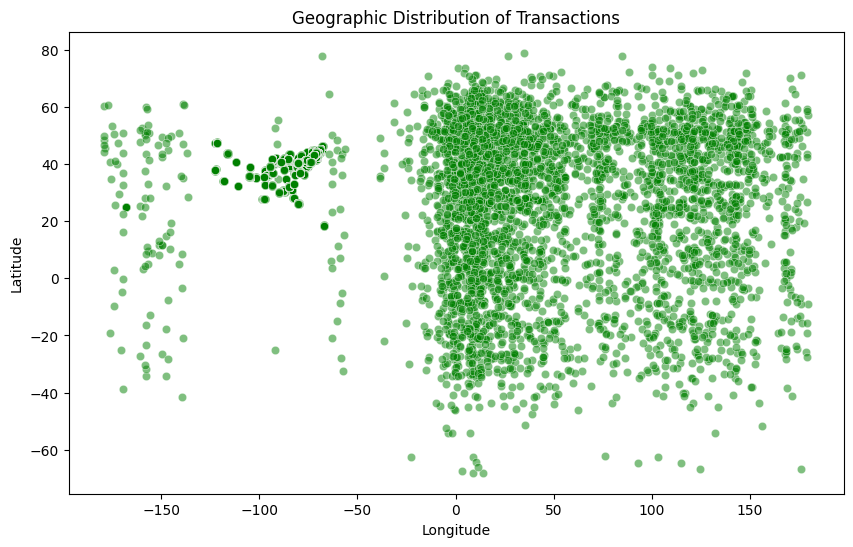

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data['Long'], y=merged_data['Lat'], alpha=0.5, color='green')
plt.title('Geographic Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

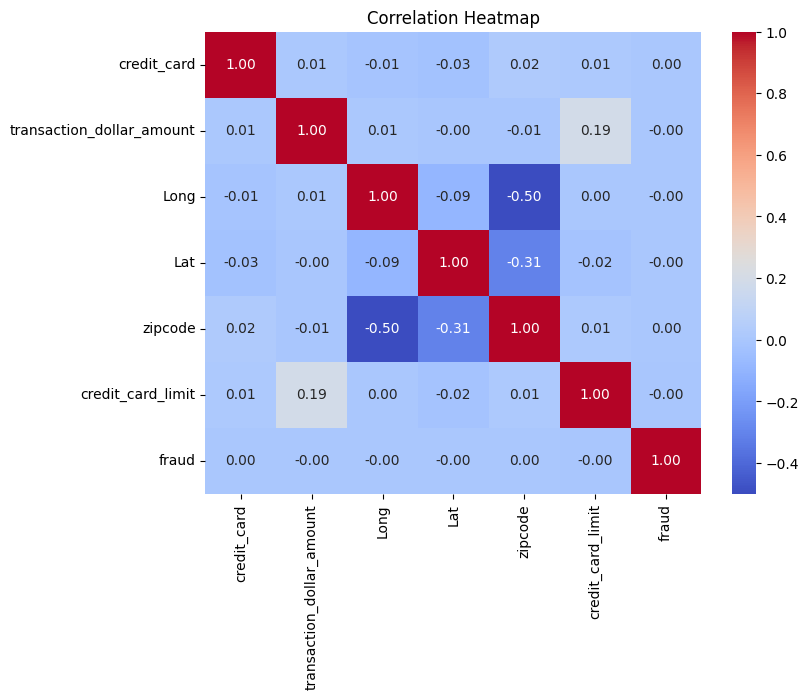

In [16]:
plt.figure(figsize=(8, 6))
correlation_matrix = merged_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Feature and Target Split
X = merged_data.drop(columns=['fraud', 'credit_card', 'date', 'city', 'state', 'zipcode'])
y = merged_data['fraud']

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [19]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [20]:
# Train RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [21]:
# Evaluate RandomForestClassifier
y_pred_rf = rf_model.predict(X_test)
print("RandomForestClassifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


RandomForestClassifier Evaluation:
Accuracy: 0.9583375765187775
ROC AUC Score: 0.4966616139892355
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     87493
           1       0.01      0.03      0.01       884

    accuracy                           0.96     88377
   macro avg       0.50      0.50      0.50     88377
weighted avg       0.98      0.96      0.97     88377



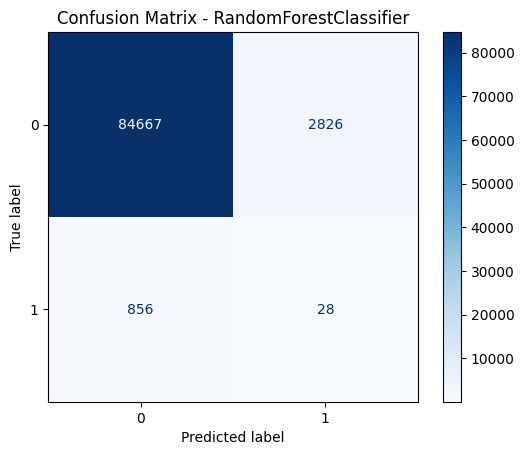

In [48]:
# Confusion Matrix for RandomForestClassifier
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "RandomForestClassifier")


In [51]:
from sklearn.metrics import roc_curve, auc


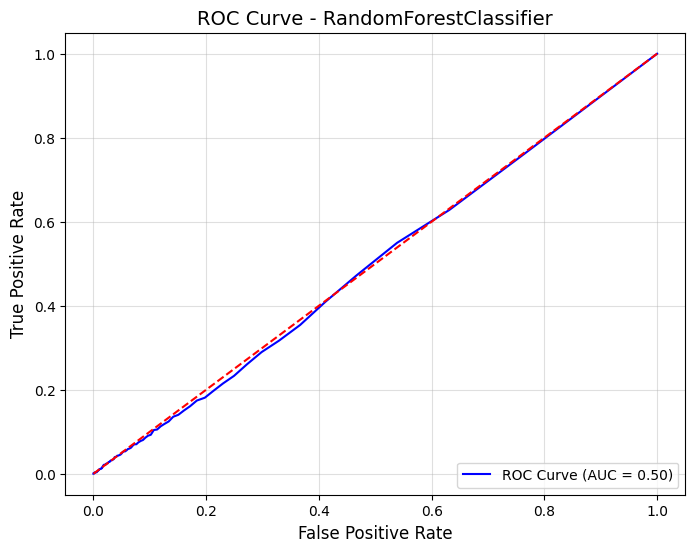

In [52]:
# ROC Curve for RandomForestClassifier
def plot_roc_curve(y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title(f'ROC Curve - {model_name}', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(alpha=0.4)
    plt.show()

plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], "RandomForestClassifier")


C:\Users\admin\AppData\Local\Temp\ipykernel_7336\27156334.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")


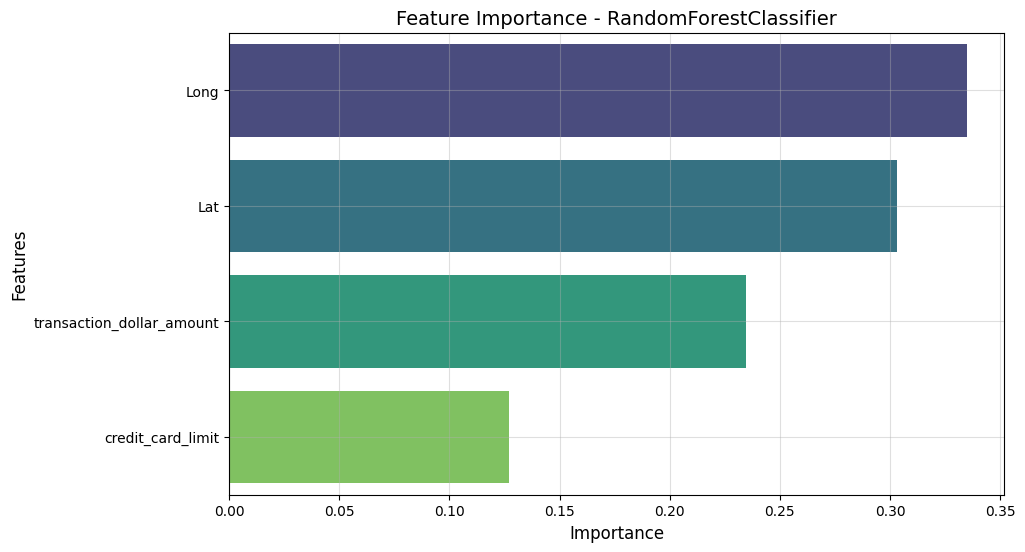

In [53]:
# Feature Importance for RandomForestClassifier
def plot_feature_importance(model, feature_names):
    plt.figure(figsize=(10, 6))
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sns.barplot(x=importances[indices], y=np.array(feature_names)[indices], palette="viridis")
    plt.title('Feature Importance - RandomForestClassifier', fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.grid(alpha=0.4)
    plt.show()

plot_feature_importance(rf_model, X.columns)


In [55]:
# Anomaly Detection Results for IsolationForest
def plot_anomaly_detection_results(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(y_pred, bins=3, color='orange', kde=False)
    plt.title(f'Anomaly Detection Results - {model_name}', fontsize=14)
    plt.xlabel('Predicted Labels (0: Normal, 1: Fraud)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(alpha=0.4)
    plt.show()


In [22]:
# Train IsolationForest
iso_forest = IsolationForest(random_state=42, contamination=0.01)
iso_forest.fit(X_train)

IsolationForest(contamination=0.01, random_state=42)

In [34]:
# Evaluate IsolationForest
anomaly_scores = iso_forest.decision_function(X_test) 
y_pred_iso = iso_forest.predict(X_test)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)  # Map -1 to fraud (1), others to 0
print("IsolationForest Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_iso))
print("Classification Report:\n", classification_report(y_test, y_pred_iso))


IsolationForest Evaluation:
Accuracy: 0.9806510743745545
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     87493
           1       0.01      0.01      0.01       884

    accuracy                           0.98     88377
   macro avg       0.50      0.50      0.50     88377
weighted avg       0.98      0.98      0.98     88377



In [24]:
# Save Results for Report
with open("model_evaluation.txt", "w") as report_file:
    report_file.write("RandomForestClassifier Evaluation:\n")
    report_file.write(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")
    report_file.write(f"ROC AUC Score: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])}\n")
    report_file.write(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}\n\n")

    report_file.write("IsolationForest Evaluation:\n")
    report_file.write(f"Accuracy: {accuracy_score(y_test, y_pred_iso)}\n")
    report_file.write(f"Classification Report:\n{classification_report(y_test, y_pred_iso)}\n")

print("Script execution completed. Results saved to 'model_evaluation.txt'.")


Script execution completed. Results saved to 'model_evaluation.txt'.


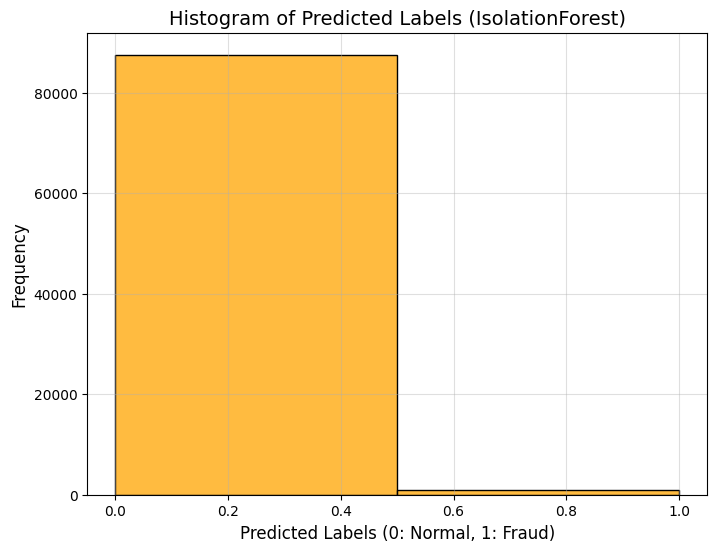

In [27]:
# 1. Histogram of Predicted Anomalies
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_iso, bins=2, kde=False, color='orange')
plt.title('Histogram of Predicted Labels (IsolationForest)', fontsize=14)
plt.xlabel('Predicted Labels (0: Normal, 1: Fraud)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.4)
plt.show()


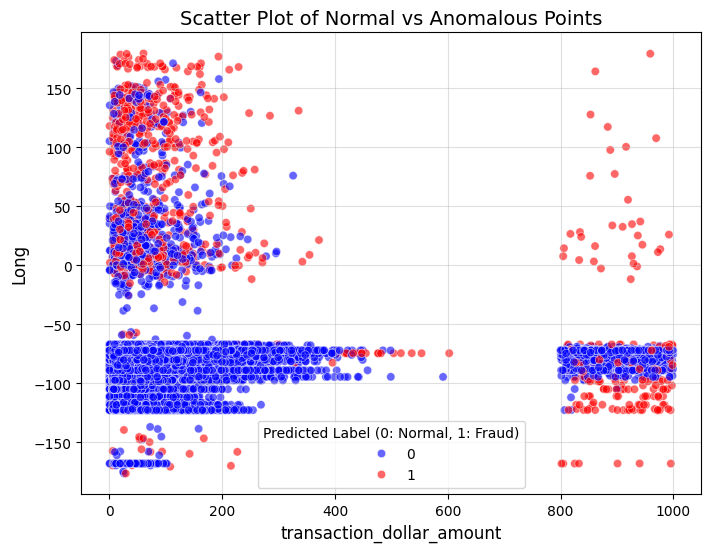

In [29]:
# 2. Scatter Plot (Visualize Normal vs Anomalous Points)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred_iso, palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title('Scatter Plot of Normal vs Anomalous Points', fontsize=14)
plt.xlabel(X_test.columns[0], fontsize=12)
plt.ylabel(X_test.columns[1], fontsize=12)
plt.legend(title='Predicted Label (0: Normal, 1: Fraud)')
plt.grid(alpha=0.4)
plt.show()

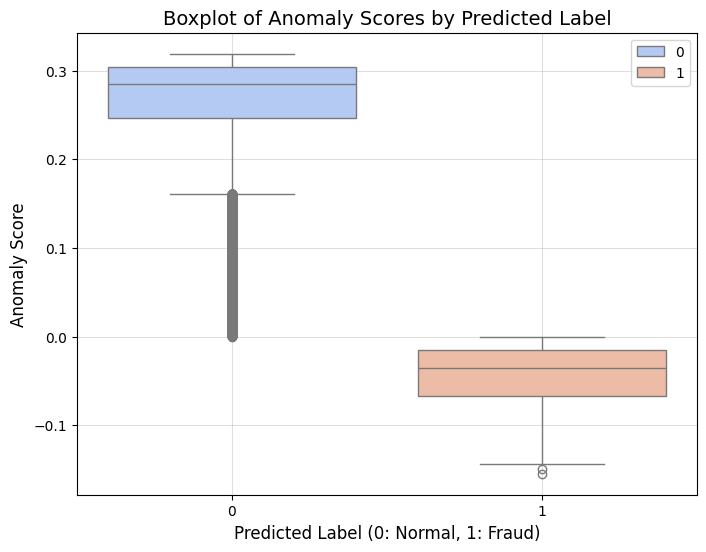

In [36]:
 #3. Boxplot of Anomaly Scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_pred_iso, y=anomaly_scores, palette='coolwarm',hue=y_pred_iso)
plt.title('Boxplot of Anomaly Scores by Predicted Label', fontsize=14)
plt.xlabel('Predicted Label (0: Normal, 1: Fraud)', fontsize=12)
plt.ylabel('Anomaly Score', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


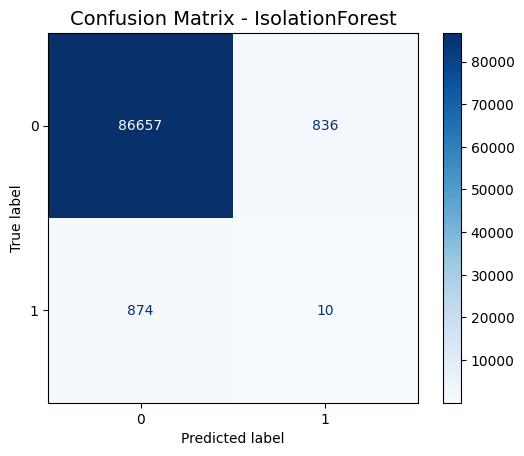

In [39]:
# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_iso)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - IsolationForest', fontsize=14)
plt.show()